In [42]:
#import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

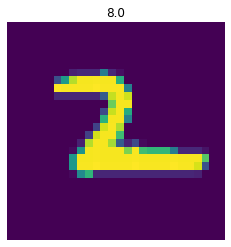

In [43]:
#prepare Dataset
#load data
train = pd.read_csv("train.csv", dtype = np.float32) # kaggle Digit Recognizer

#split data info features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 #normalization

#train test split. Size of train data is %80 and size of test data %20
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

#create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first 
#we create tensor,  then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

#create feature and targets tensor for test set
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

#batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

#pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

#data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

#visualize one of the images in data set
plt.imshow(features_numpy[44].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[44]))
plt.savefig("graph.png")
plt.show()

In [44]:
#Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        #linear part
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out  =self.linear(x)
        return out
    
# instantiate model class
input_dim = 28*28 #size of image px*px
output_dim = 10 # labels 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

#create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

#cross entropy loss
error = nn.CrossEntropyLoss() #softmax is defined here

#SGD optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [45]:
# training model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        

        #define variables
        train = Variable(images.view(-1,28*28)) #flatten(784 vectors)
        labels = Variable(labels)
        
        #clear gradients
        optimizer.zero_grad()
         
        #forward propagation (Automatically calls forward function in LogisticRegressionModel)
        outputs = model(train) 
        
        #calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # calculate gradients
        loss.backward()
       
        #update parameters
        optimizer.step()

        count+=1
        
        #prediction
        if count%50 == 0:
            #calculate accuracy
            correct = 0
            total = 0
            #predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                #forward propagation
                outputs = model(test)
                                
                #get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                #total number of labels
                total += len(labels)
                
                #total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            #store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            #print loss
            print("iteration: {} loss: {} accuracy: {}%".format(count, loss.data, accuracy))                

iteration: 500 loss: 1.8241043090820312 accuracy: 66.01190185546875%
iteration: 1000 loss: 1.604768991470337 accuracy: 74.21428680419922%
iteration: 1500 loss: 1.2825785875320435 accuracy: 77.57142639160156%
iteration: 2000 loss: 1.1972886323928833 accuracy: 79.79762268066406%
iteration: 2500 loss: 1.0268889665603638 accuracy: 80.92857360839844%
iteration: 3000 loss: 0.9319267272949219 accuracy: 81.77381134033203%
iteration: 3500 loss: 0.9140358567237854 accuracy: 82.4047622680664%
iteration: 4000 loss: 0.757249653339386 accuracy: 82.94047546386719%
iteration: 4500 loss: 0.9653962850570679 accuracy: 83.3452377319336%
iteration: 5000 loss: 0.8069674968719482 accuracy: 83.71428680419922%
iteration: 5500 loss: 0.7478561401367188 accuracy: 84.16666412353516%
iteration: 6000 loss: 0.8762719631195068 accuracy: 84.45237731933594%
iteration: 6500 loss: 0.6630396842956543 accuracy: 84.69047546386719%
iteration: 7000 loss: 0.6989670395851135 accuracy: 84.97618865966797%
iteration: 7500 loss: 0.6

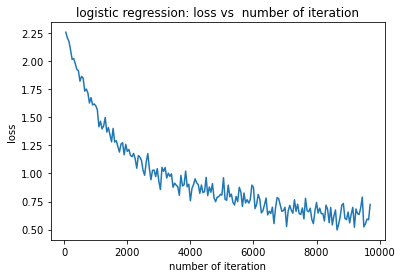

In [46]:
#visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("number of iteration")
plt.ylabel("loss")
plt.title("logistic regression: loss vs  number of iteration")
plt.show()